In [4]:
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from skntk import NeuralTangentKernel as NTK
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [5]:
data=pd.read_csv(r'D:\CODING\Python\NLP\END_SEM\IMDB Dataset.csv')

In [6]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)  # Join tokens back into a single string


data['review'] = data['review'].apply(preprocess_text)

data['label'] = data['sentiment'].map({'positive': 1, 'negative': 0})


In [7]:
data.head()

,review,sentiment,label
0,one reviewers mentioned watching oz episode yo...,positive,1
1,wonderful little production br br filming tech...,positive,1
2,thought wonderful way spend time hot summer we...,positive,1
3,basically theres family little boy jake thinks...,negative,0
4,petter matteis love time money visually stunni...,positive,1


In [8]:
num_iterations = 50

svm_reports = []
rf_reports = []
xgb_reports = []

for i in range(num_iterations):
    print(f"Iteration {i + 1}:")

    df_subset = data.sample(n=5000, random_state=i)

    bow_vectorizer = CountVectorizer()
    X_bow = bow_vectorizer.fit_transform(df_subset['review'])

    X_train, X_test, y_train, y_test = train_test_split(X_bow, df_subset['label'], test_size=0.2, random_state=42)


    # SVM
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)
    svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
    svm_reports.append(svm_report)

    # Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
    rf_reports.append(rf_report)

    # XGBoost
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)
    xgb_reports.append(xgb_report)
    

Iteration 1:
Iteration 2:
Iteration 3:
Iteration 4:
Iteration 5:
Iteration 6:
Iteration 7:
Iteration 8:
Iteration 9:
Iteration 10:
Iteration 11:
Iteration 12:
Iteration 13:
Iteration 14:
Iteration 15:
Iteration 16:
Iteration 17:
Iteration 18:
Iteration 19:
Iteration 20:
Iteration 21:
Iteration 22:
Iteration 23:
Iteration 24:
Iteration 25:
Iteration 26:
Iteration 27:
Iteration 28:
Iteration 29:
Iteration 30:
Iteration 31:
Iteration 32:
Iteration 33:
Iteration 34:
Iteration 35:
Iteration 36:
Iteration 37:
Iteration 38:
Iteration 39:
Iteration 40:
Iteration 41:
Iteration 42:
Iteration 43:
Iteration 44:
Iteration 45:
Iteration 46:
Iteration 47:
Iteration 48:
Iteration 49:
Iteration 50:


In [9]:
def average_classification_report(reports):
    avg_report = {}
    for metric in reports[0].keys():
        if isinstance(reports[0][metric], dict):
            avg_report[metric] = {cls: np.mean([report[metric][cls] for report in reports]) for cls in reports[0][metric].keys()}
        else:
            avg_report[metric] = np.mean([report[metric] for report in reports])
    return avg_report


In [10]:
avg_svm_report = average_classification_report(svm_reports)
print("Average SVM Classification Report:")
print(avg_svm_report)


Average SVM Classification Report:
{'0': {'precision': 0.8655071482231304, 'recall': 0.7778054983666058, 'f1-score': 0.8191442816176681, 'support': 506.92}, '1': {'precision': 0.7931941940507804, 'recall': 0.87559157861243, 'f1-score': 0.8322262471608881, 'support': 493.08}, 'accuracy': 0.8261, 'macro avg': {'precision': 0.8293506711369554, 'recall': 0.8266985384895178, 'f1-score': 0.8256852643892781, 'support': 1000.0}, 'weighted avg': {'precision': 0.8300720899862074, 'recall': 0.8261, 'f1-score': 0.8257475095824828, 'support': 1000.0}}


In [11]:
avg_rf_report = average_classification_report(rf_reports)
print("Average Random Forest Classification Report:")
print(avg_rf_report)


Average Random Forest Classification Report:
{'0': {'precision': 0.8324736764974012, 'recall': 0.8304313745873809, 'f1-score': 0.8312239062002146, 'support': 506.92}, '1': {'precision': 0.8263599299850084, 'recall': 0.8279867782032434, 'f1-score': 0.826936490979757, 'support': 493.08}, 'accuracy': 0.8292800000000001, 'macro avg': {'precision': 0.8294168032412048, 'recall': 0.829209076395312, 'f1-score': 0.8290801985899858, 'support': 1000.0}, 'weighted avg': {'precision': 0.8296875213182604, 'recall': 0.8292800000000001, 'f1-score': 0.829251369196664, 'support': 1000.0}}


In [12]:
avg_xgb_report = average_classification_report(xgb_reports)
print("Average XGBoost Classification Report:")
print(avg_xgb_report)


Average XGBoost Classification Report:
{'0': {'precision': 0.8379616340098525, 'recall': 0.8032774256018846, 'f1-score': 0.8200808690988157, 'support': 506.92}, '1': {'precision': 0.8061353827634634, 'recall': 0.840164966183279, 'f1-score': 0.8226396297473729, 'support': 493.08}, 'accuracy': 0.8215399999999999, 'macro avg': {'precision': 0.8220485083866579, 'recall': 0.8217211958925819, 'f1-score': 0.8213602494230944, 'support': 1000.0}, 'weighted avg': {'precision': 0.8224966626875084, 'recall': 0.8215399999999999, 'f1-score': 0.8214944993355193, 'support': 1000.0}}


In [13]:
# Get the best model based on the accuracy score 

accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(accuracy_svm, accuracy_rf, accuracy_xgb)

0.829 0.825 0.812


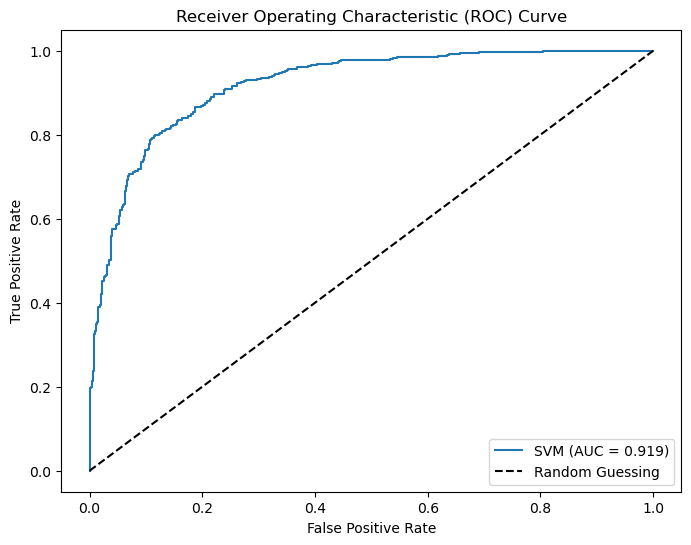

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_model.decision_function(X_test))
svm_auc = auc(svm_fpr, svm_tpr)
ax.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.3f})'.format(svm_auc))

# Random guessing line
ax.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Axis labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')

# Legend
ax.legend(loc='best')

# Show the plot
plt.show()